$$\require{mhchem}$$       

# Transient CSTR

Consider a transient CSTR with the following kinetics:
\begin{align*}
\ce{A->[k]B}
\end{align*}
There is an inlet feed at temperature $T_0$, with a concentration $C_{A,0}$.
The various parameters are

| Parameter        | Value  $\quad\quad\quad$          | Units    |
|----------------|------------------|----------|
| $T_0$        | 298              | K        |
| $T_m$        | 298              | K        |
| $\hat{C}_p$    | 4.0              | kJ/kg K  |
| $C_{A,0}$       | 2.0              | kmol/m$^3$ |
| $k_m \: (T_m)$     | 0.004            | 1/min    |
| E            | $1.5 \times 10^4$ | K        |
| $\rho$       | $10^3$           | kg/m$^3$   |
| $\Delta H_R$ | $-2.2 \times 10^5$  | kJ/kmol  |
| U | 340 | kJ/min/K|

You can assume a reactor size of 1 m$^3$. The residence time ($\tau$) is 30 min, and from that the volumetric feed rate can be calculated ($\nu=V/\tau$). Heat is transferred to the reactor with a cooling jacket with heat transfer coefficient $U$ and a set point of $T_{set}=298$ K.

#### Calculate the concentration and temperature profile for the first 500 minutes (4 points).

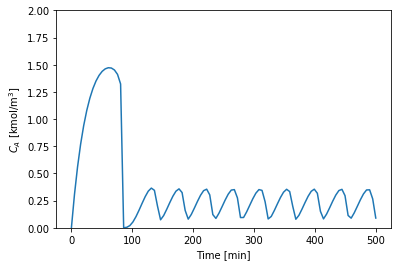

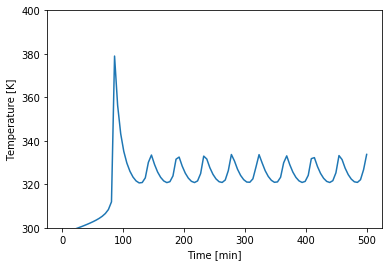

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

T_in = 298    # K
Tm = 298      # K
Cp = 4.0      # kJ/kg K
Ca_in = 2.0   # kmol/m^3
km0 = 0.004   # 1/min
E = 1.5E4     # K
rho = 10.**3  # kg/m^3
dHR = -2.2E5  # kJ/kmol
V = 1         # m^3
tau = 30      # min
nu = V/tau    # m^3/min
U = 340       # kJ/min/K
Tset = 298    # K
R = 8.3145    # kJ/kmol K


def kfun(T):
    ''' Calculate the rate constant as a function of temperature '''
    return km0*np.exp(-E*(1/T-1/Tm))


def ode(X, t):
    ''' Integrate the moles A (Na) and Temperature throughout time '''
    Na, T = X
    Ca = Na/V
    k = kfun(T)
    rate = k*Ca
    dTdt = (-(dHR*rate*V)+nu*(T_in-T)*Cp*rho+U*(Tset-T))/(V*rho*Cp)
    dCadt = -rate*V + (Ca_in-Ca)*nu
    return [dCadt, dTdt]


# Set the integration range and integrate
trange = np.linspace(0, 500, 100)
sol = odeint(ode, [0, 298], trange)

# Plot concentration
plt.plot(trange, sol[:, 0])
plt.xlabel('Time [min]')
plt.ylabel('$C_A$ [kmol/m$^3$]')
plt.ylim([0, 2])
plt.show()
# Plot temperature
plt.plot(trange, sol[:, 1])
plt.xlabel('Time [min]')
plt.ylabel('Temperature [K]')
plt.ylim([300, 400])
plt.show()

A starting concentration of $C_A$ of 2.0 kmol/m$^3$ is also acceptable, since the question was ambiguous regarding this detail.

#### Calculate a steady state solution for $C_{A,0}$ and temperature, T (3 points)

In [2]:
from scipy.optimize import fsolve
from functools import partial


def eqns(X, t):
    '''
    These are the differential equations describing the temperature and the concentration
    of species A. These differentials should be zero at steady-state. Thus, these
    differentials can also be used as objective functions fors fsolve.
    '''
    Na, T = X
    Ca = Na/V
    k = kfun(T)
    rate = k*Ca
    dTdt = (-(dHR*rate*V)+nu*(T_in-T)*Cp*rho+U*(Tset-T))/(V*rho*Cp)
    dCadt = -k*Ca*V+(Ca_in-Ca)*nu
    return [dCadt, dTdt]

# Solve and report
sol = fsolve(partial(eqns, t=0), [0.2, 328])
C = sol[0]
T = sol[1]
print('The steady-state concentration of species A is %.3f kmol/m^3' % C)
print('The steady-state temperature is %.0f K' % T)

The steady-state concentration of species A is 0.203 kmol/m^3
The steady-state temperature is 326 K


#### Assume that operation starts with the concentration of species A ($C_A$) and temperature (T) at the steady-state values you calculated above. Plot $C_A$ and T for the first 1000 minutes (3 points).

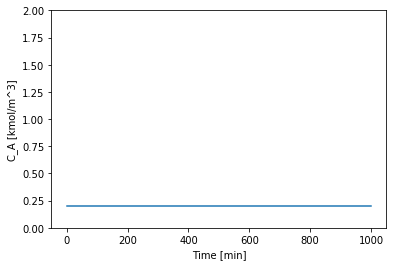

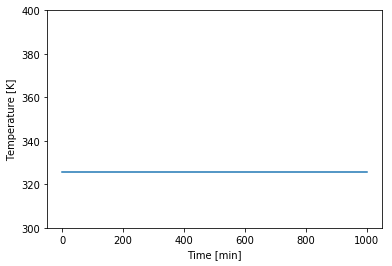

In [3]:
# We can use the same exact integrator we used in problem 1, but with a different initial state
trange = np.linspace(0, 1000, 100)
profiles = odeint(ode, sol, trange)
concs = profiles[:, 0]
temps = profiles[:, 1]

# Plot concentration
plt.plot(trange, concs)
plt.xlabel('Time [min]')
plt.ylabel('C_A [kmol/m^3]')
plt.ylim([0, 2]) 
plt.show()
# Plot temperature
plt.plot(trange, temps)
plt.xlabel('Time [min]')
plt.ylabel('Temperature [K]')
plt.ylim([300, 400])
plt.show()

#### Now plot $C_A$ and T again, but perturb\* the initial concentration of A by +0.001 M, and perturb\* the initial temperature by +0.001 K. Do you think that it would be feasible to maintain the process at the steady-state conditions you found above? Why or why not? (4 points)

*In this case, "perturb" means to simply change the value by a small amount

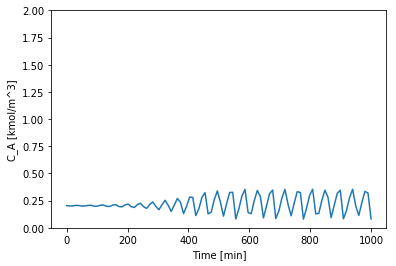

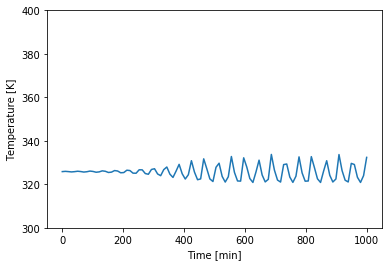

In [4]:
# Just do it again, but perturb the starting point
profiles = odeint(ode, sol+[0.001, 0.001], trange)
concs = profiles[:, 0]
temps = profiles[:, 1]

# Plott the concentration
plt.plot(trange, concs)
plt.xlabel('Time [min]')
plt.ylabel('C_A [kmol/m^3]')
plt.ylim([0, 2])
plt.show()
# Plot the temperature
plt.plot(trange, temps)
plt.xlabel('Time [min]')
plt.ylabel('Temperature [K]')
plt.ylim([300, 400])
plt.show()

It is not feasible to maintain that steady-state, because it is actually metastable. Any slight perturbation in concentration or temperature causes the system to begin oscillating.

# Bonus
#### Vary the residence time from 5 to 30 and identify the residence time at which the steady state becomes stable, to the nearest minute (4 points maximum).

Here, we literally copy/pasted the pertinent parts of the previous code to be able to
re-calculate the profiles. We manually ajdusted the residence time until we saw stable behavior.

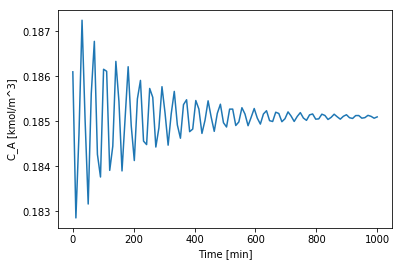

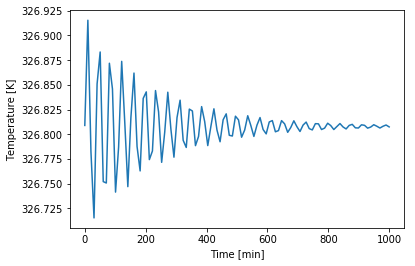

In [5]:
tau = 29      # min
nu = V/tau    # m^3/min
def ode(X, t):
    ''' Integrate the moles A (Na) and Temperature throughout time '''
    Na, T = X
    Ca = Na/V
    k = kfun(T)
    rate = k*Ca
    dTdt = (-(dHR*rate*V)+nu*(T_in-T)*Cp*rho+U*(Tset-T))/(V*rho*Cp)
    dCadt = -rate*V + (Ca_in-Ca)*nu
    return [dCadt, dTdt]
sol = fsolve(partial(eqns, t=0), [0.2, 328])
profiles = odeint(ode, sol+[0.001, 0.001], trange)
concs = profiles[:, 0]
temps = profiles[:, 1]

# Plott the concentration
plt.plot(trange, concs)
plt.xlabel('Time [min]')
plt.ylabel('C_A [kmol/m^3]')
# plt.ylim([0, 2])
plt.show()
# Plot the temperature
plt.plot(trange, temps)
plt.xlabel('Time [min]')
plt.ylabel('Temperature [K]')
# plt.ylim([300, 400])
plt.show()

A residence time of 29 minutes yields a stable steady-state. Although the system may appear to be under-dampened, the oscillations are relatively small given the overall scale of temperature and concentrations. Other residence times with higher dampening may be considered as correct answers, but only if an appropriate explanation is offered.